(128, 128, 3)


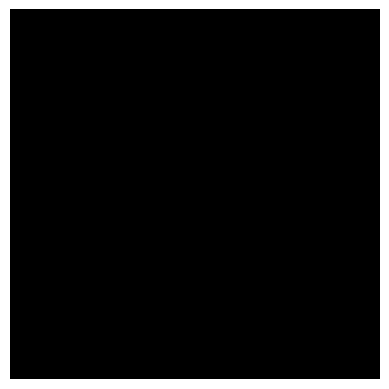

(128, 128, 3)


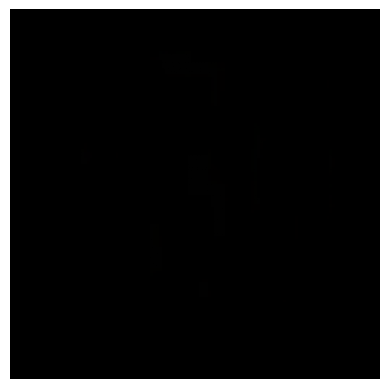

(128, 128, 3)


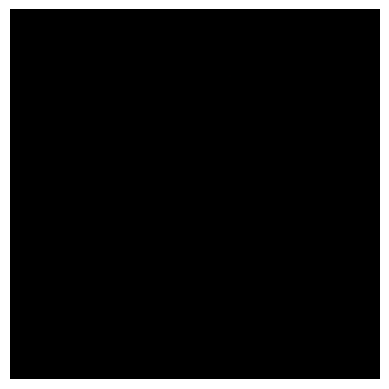

(128, 128, 3)


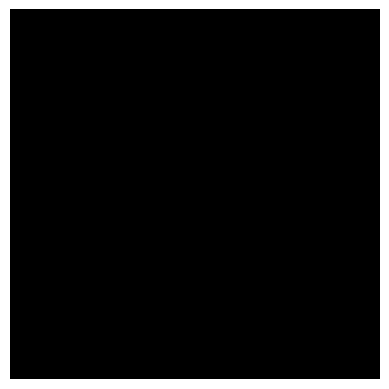

(128, 128, 3)


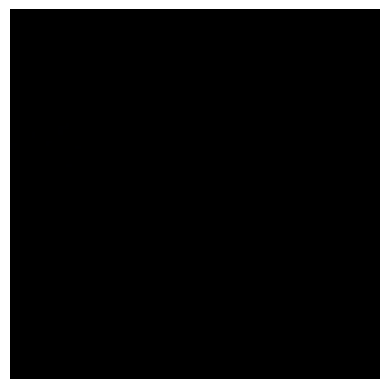

In [12]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from skimage import transform
import matplotlib.pyplot as plt

# Load the trained model
json_file = open('wpod-net\wpod-net.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('wpod-net\wpod-net.h5')

# Define the plate detection function
def detect_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to the image
    gray = cv2.GaussianBlur(gray, (7,7), 0)
    # Threshold the image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort the contours by area
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    # Keep the top 5 contours
    contours = contours[:5]
    # Iterate over the contours and detect the plate
    for contour in contours:
        # Get the bounding box of the contour
        x,y,w,h = cv2.boundingRect(contour)
        # Extract the plate region from the image
        plate_img = img[y:y+h, x:x+w]
        # Resize the plate region to 128x128
        plate_img = transform.resize(plate_img, (128, 128))
        # Normalize the plate region
        plate_img = plate_img / 255.
        # Reshape the plate region to (1, 128, 128, 3)
#         plate_img = plate_img.reshape((1, 128, 128, 3))
        print(plate_img.shape)
        # Display the cropped plate image using Matplotlib
#         resized_plate_img = cv2.resize(plate_img, (256, -1))
        plt.imshow(plate_img)
        plt.axis('off')
        plt.show()

# Call the plate detection function
detect_plate('Plate_examples\germany_car_plate.jpg')